# Πρόλογος

# Εισαγωγή βιβλιοθηκών

In [1]:
# Οργάνωση και ανάλυση δεδομένων
import pandas as pd

# Αριθμητικοί υπολογισμοί σε πίνακες
import numpy as np

# Ορισμός μέγιστου αριθμού εμφανιζόμενων γραμμών και στηλών
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 100

# Οπτικοποίηση δεδομένων
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler για το χαρακτηριστικό Height
from sklearn.preprocessing import MinMaxScaler

# Κατανομή των δεδομένων σε εκπαίδευσης και ελέγχου.
from sklearn.model_selection import train_test_split

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Cross Validation
from sklearn.model_selection import cross_val_score

## Ανάγνωση αρχείου δεδομένων τύπου csv

In [2]:
data=pd.read_csv('FM Dataset.csv')

## Μελέτη δεδομένων

#### Αφαίρεση Goalkeepers

In [3]:
data = data[data['Position'] != 'GK'].reset_index(drop=True)

In [4]:
data.shape # 7755 δείγματα και 59 χαρακτηριστικά

(7755, 59)

#### Εμφάνιση των 5 πρώτων γραμμών δεδομένων

In [5]:
scale_feature = ['Height']
scaler = MinMaxScaler(feature_range=(0, 20))
data[scale_feature] = scaler.fit_transform(data[scale_feature])

In [6]:
data.head()

,Name,UniqueID,Position,CurrentAbility,Nationality,Club,Age,Height,LeftFoot,RightFoot,Corners,Crossing,Dribbling,Finishing,FirstTouch,FreeKickAccuracy,HeadingAccuracy,LongShots,LongThrows,Marking,Passing,Penalties,Tackling,Technique,Aggression,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,OffTheBallMovement,Positioning,Teamwork,WorkRate,Acceleration,Agility,Balance,Jumping,NaturalFitness,Pace,Stamina,Strength,LeftBack,CenterBack,RightBack,CentralMidfielder,AttackingMidfielder,LeftWinger,RightWinger,Striker,Unnamed: 54,Unnamed: 55,Unnamed: 56,DefensiveMidfielder,CM
0,Kevin De Bruyne,18004457,M/AM RLC,189,Belgium,Manchester City,31,10.416667,16,20,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,1,1,1,16,20,14,14,12,NaN,NaN,NaN,12,20
1,Kylian Mbappé,85139014,AM/S RL,188,France,Paris Saint-Germain,23,9.166667,10,20,13,13,18,17,18,12,7,13,4,4,15,18,4,17,6,17,12,18,14,15,15,15,18,13,18,3,10,10,20,16,15,8,15,20,14,11,1,1,1,1,1,19,17,20,NaN,NaN,NaN,1,1
2,Robert Lewandowski,719601,S,186,Poland,Barcelona,33,12.083333,13,20,3,8,13,19,18,15,17,12,3,7,13,20,7,16,15,19,16,17,17,13,17,20,14,15,19,7,12,12,14,13,19,15,20,14,18,16,1,1,1,1,12,10,8,20,NaN,NaN,NaN,1,1
3,Erling Haaland,29179241,S,185,"Norway,England",Manchester City,22,16.250000,20,11,7,10,14,18,16,13,15,13,5,6,13,17,7,15,13,18,15,18,15,14,13,20,16,13,18,7,13,13,17,16,17,18,19,19,14,17,1,1,1,1,1,1,1,20,NaN,NaN,NaN,1,1
4,Mohamed Salah,98028755,AM/S RL,185,Egypt,Liverpool,30,7.916667,20,8,12,14,17,17,17,12,10,13,6,7,15,17,7,17,11,16,11,15,15,17,15,18,15,11,18,9,15,16,18,16,18,8,17,18,15,15,1,1,1,1,12,17,20,19,NaN,NaN,NaN,1,1


In [7]:
num_lb = len(data[data['LeftBack'] >= 15])
num_cb = len(data[data['CenterBack'] >= 15])
num_rb = len(data[data['RightBack'] >= 15])
num_cm = len(data[data['CentralMidfielder'] >= 15])
num_lw = len(data[data['LeftWinger'] >= 15])
num_cam = len(data[data['AttackingMidfielder'] >= 15])
num_rw = len(data[data['RightWinger'] >= 15])
num_st = len(data[data['Striker'] >= 15])

In [8]:
print('LB:', num_lb)
print('CB:', num_cb)
print('RB:', num_rb)
print('CM:', num_cm)
print('LW:', num_lw)
print('CAM:', num_cam)
print('RW:', num_rw)
print('ST:', num_st)

LB: 867
CB: 1715
RB: 802
CM: 1861
LW: 2080
CAM: 2010
RW: 2003
ST: 1810


In [9]:
data_num = {'LB': 867, 'CB': 1715, 'RB': 802, 
            'CM': 1861, 
            'LW': 2080, 'CAM': 2010, 'RW': 2003, 'ST': 1810}

In [10]:
df = pd.DataFrame.from_dict(data_num, orient='index', columns=['count'])

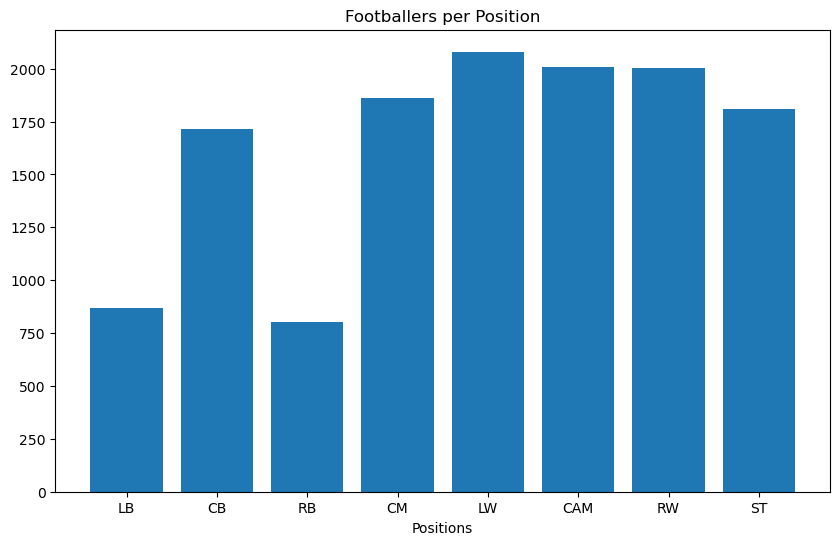

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(df.index, df['count'])
plt.xlabel('Positions')
plt.ylabel('')
plt.title('Footballers per Position')
plt.show()

## Feature Selection

In [12]:
features = ['Height', 'LeftFoot', 'RightFoot', 'Corners', 'Crossing', 'Dribbling', 'Finishing',
            'HeadingAccuracy', 'LongShots', 'LongThrows', 'Marking', 'Passing', 'Tackling', 'Vision', 'Flair', 
            'OffTheBallMovement', 'Positioning', 'Acceleration', 'Jumping', 'Pace', 'Strength']

### Feature Correlation Matrix

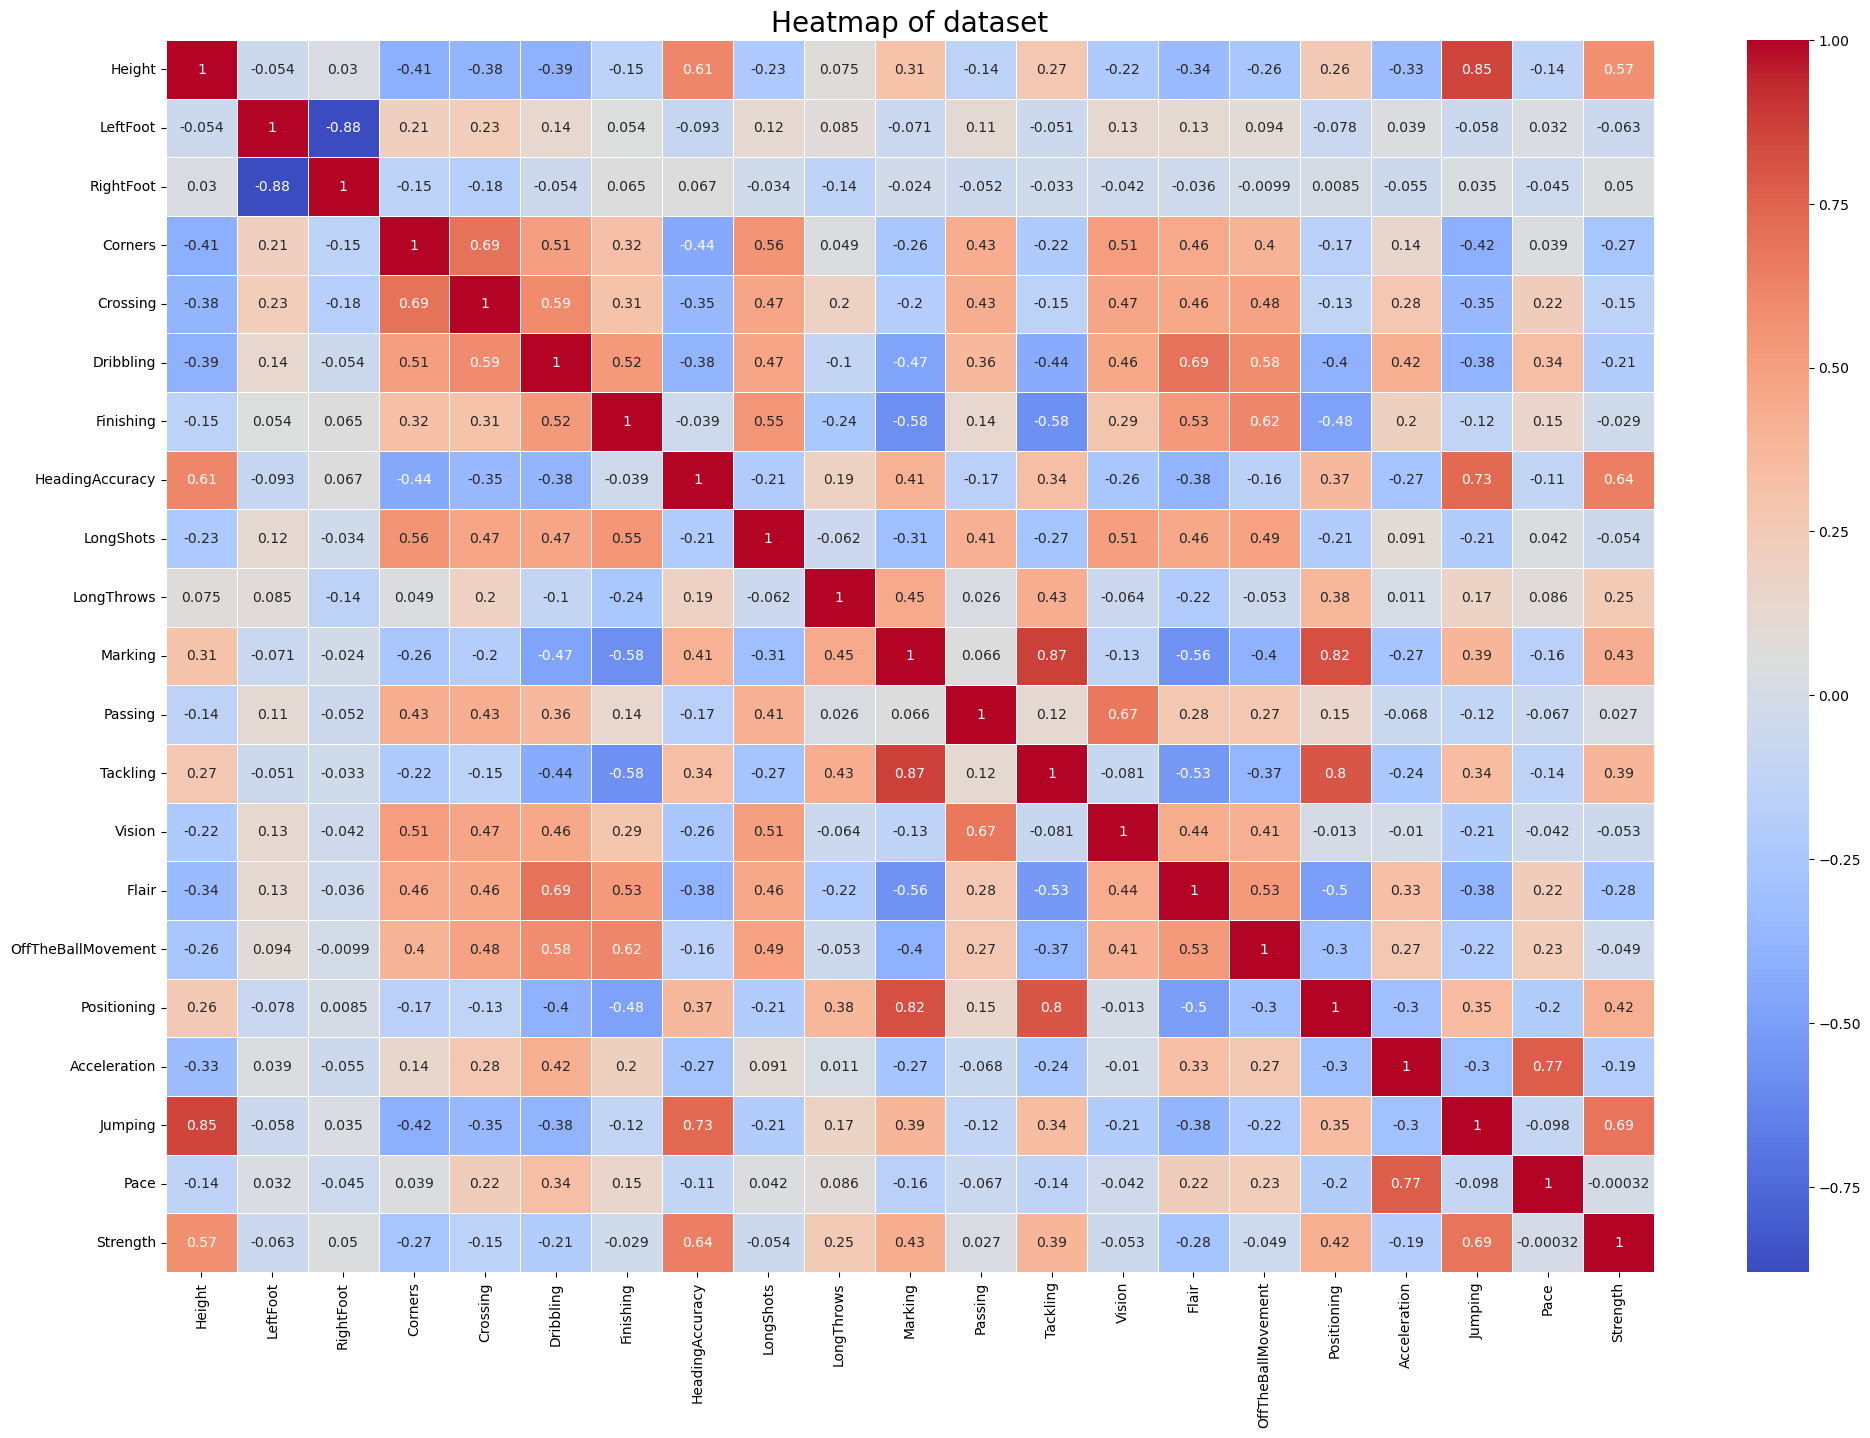

In [13]:
plt.rcParams['figure.figsize']=(24, 16)
hm=sns.heatmap(data[features].corr(), annot = True, linewidths=.5, cmap='coolwarm')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

## Classification Labels

In [14]:
classification_labels = ['LeftBack', 'CenterBack', 'RightBack',
                         'CentralMidfielder',
                         'LeftWinger', 'AttackingMidfielder', 'RightWinger',
                         'Striker']

#### Διάταξη μέσα στον αγωνιστικό χώρο

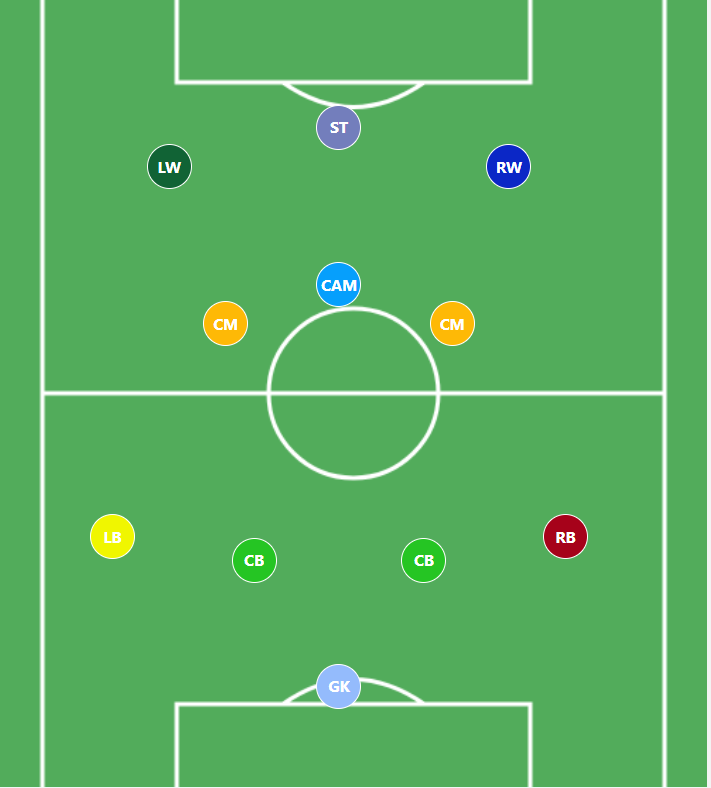

In [15]:
from IPython import display
display.Image('lineup.png')

### Classification Labels Correlation Matrix

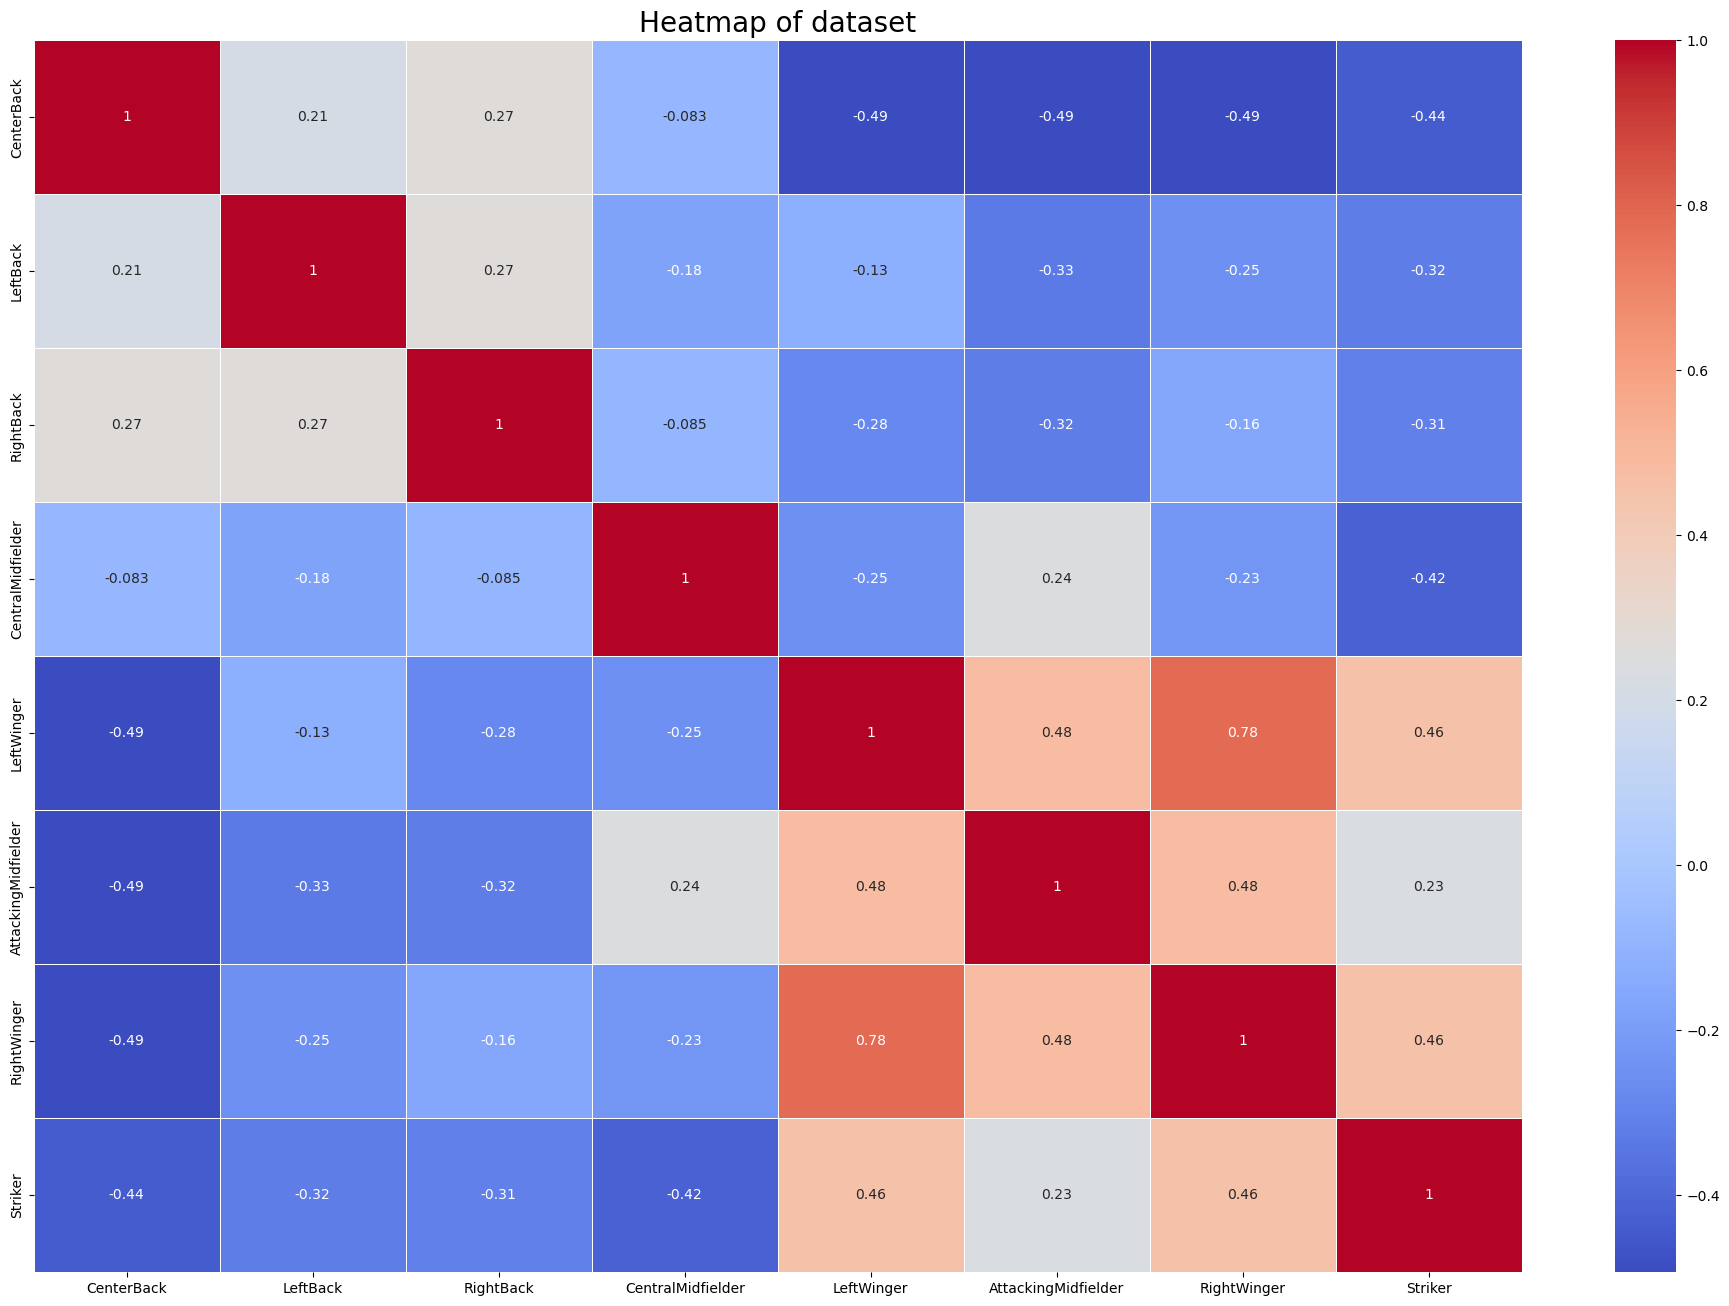

In [16]:
plt.rcParams['figure.figsize']=(24, 16)
hm=sns.heatmap(data[['CenterBack', 'LeftBack', 'RightBack', 
                     'CentralMidfielder',
                     'LeftWinger', 'AttackingMidfielder', 'RightWinger', 'Striker']].corr(), annot = True, linewidths=.5, 
                      cmap='coolwarm')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

## Feature and Classification Labels Correlation Matrix

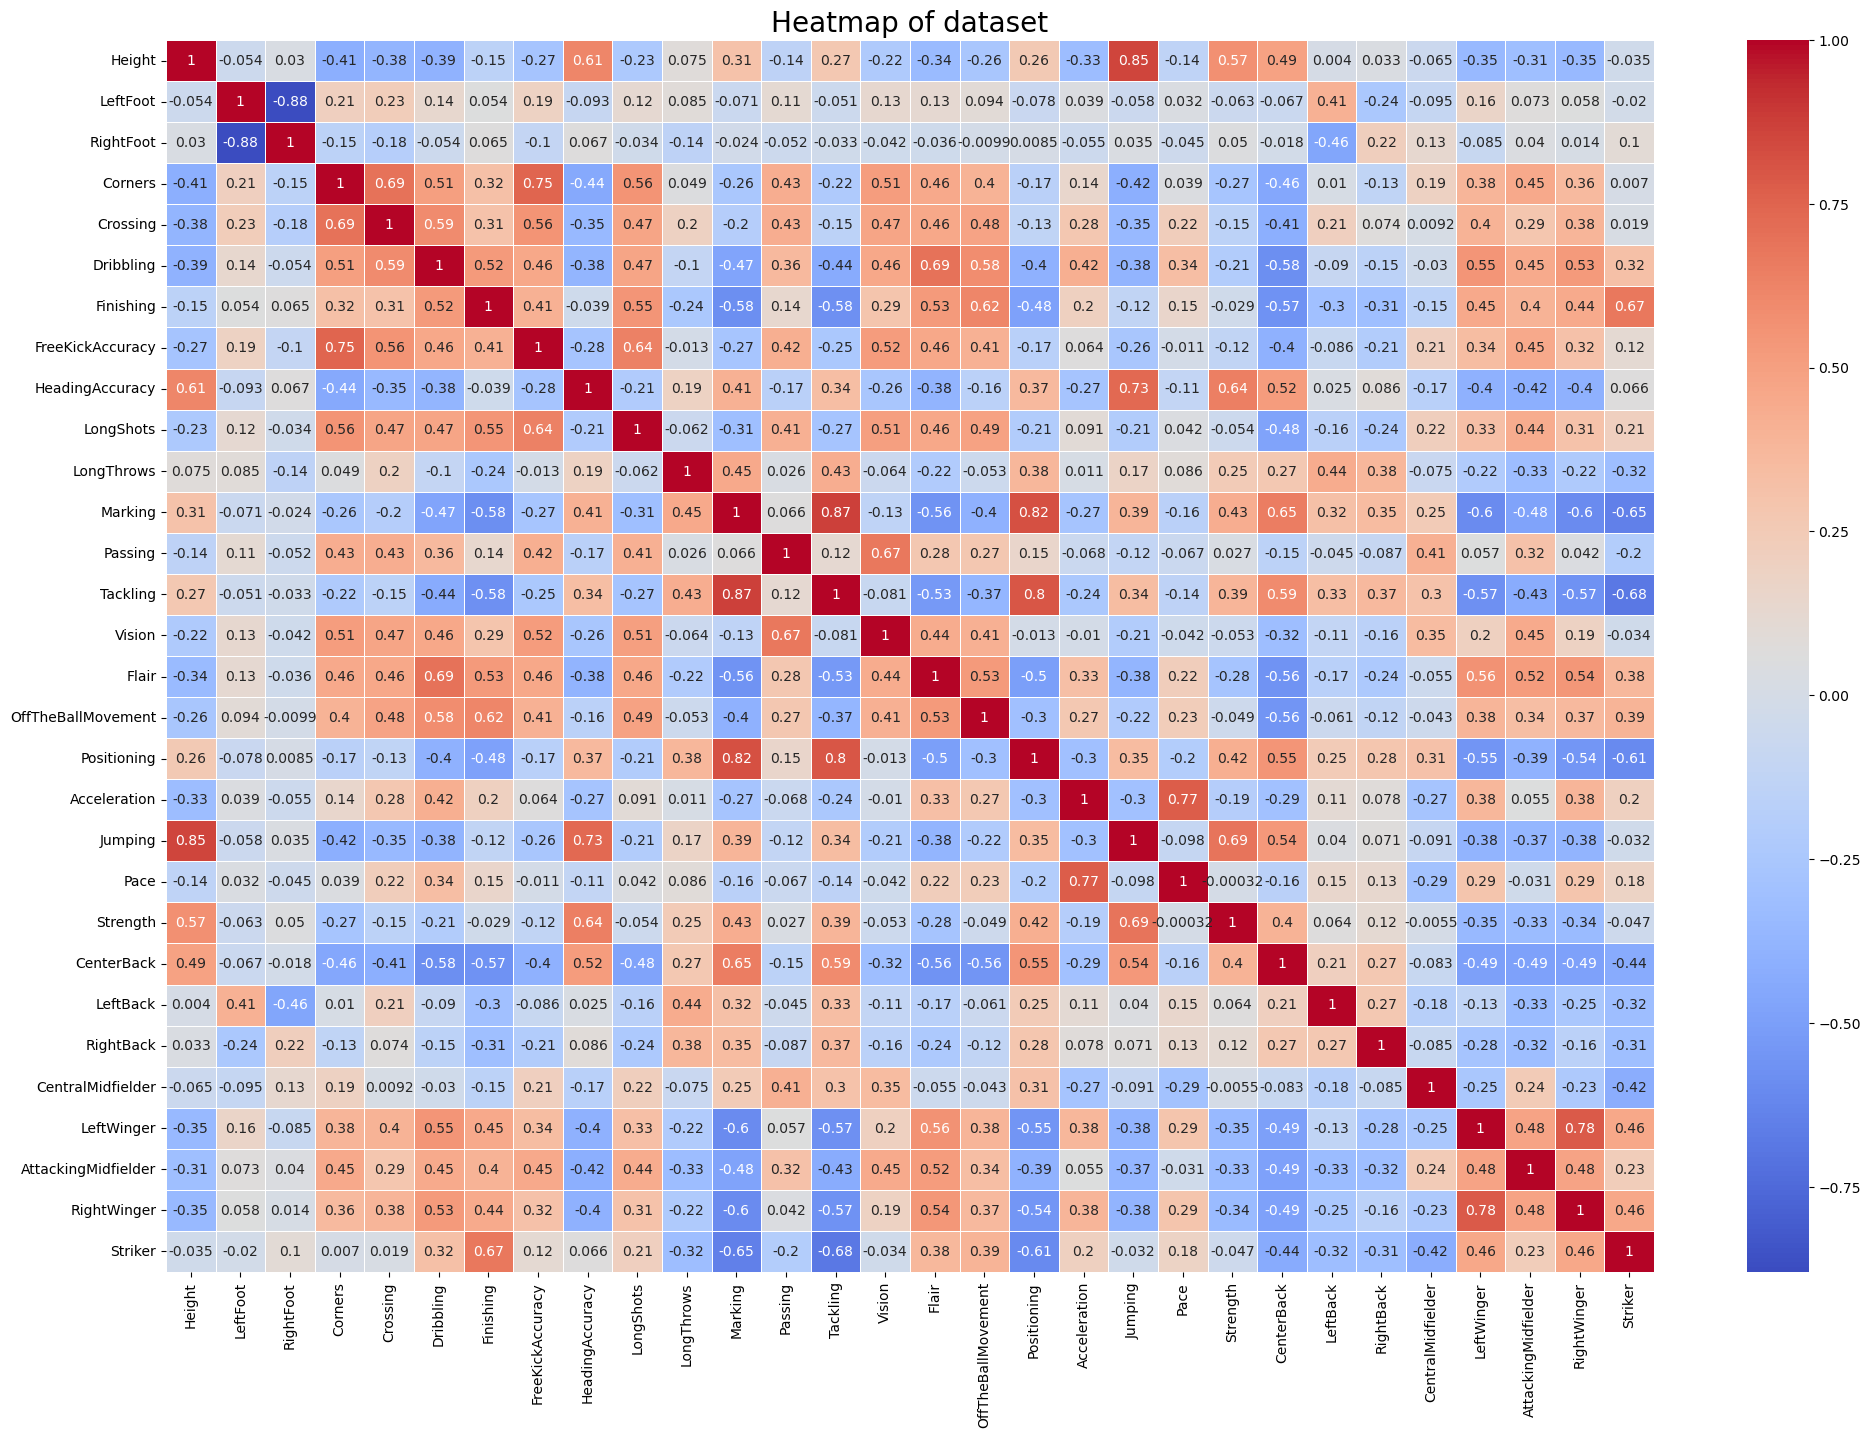

In [17]:
plt.rcParams['figure.figsize']=(24, 16)
hm=sns.heatmap(data[['Height', 'LeftFoot', 'RightFoot', 'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FreeKickAccuracy', 
            'HeadingAccuracy', 'LongShots', 'LongThrows', 'Marking', 'Passing', 'Tackling', 'Vision', 'Flair', 
            'OffTheBallMovement', 'Positioning', 'Acceleration', 'Jumping', 'Pace', 'Strength', 
            'CenterBack', 'LeftBack', 'RightBack', 
            'CentralMidfielder',
            'LeftWinger', 'AttackingMidfielder', 'RightWinger', 'Striker']].corr(), annot = True, linewidths=.5, 
            cmap='coolwarm')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

## Διαχωρισμός σε δεδομένα εκπαίδευσης και δεδομένα ελέγχου

In [18]:
X = data[features]
y = data[classification_labels]
# 21 features και 8 classification labels

## Κριτήριο κατηγοριοποίησης

In [19]:
y[y<15] = 0
y[y>=15] = 1

C:\Users\vassi\AppData\Local\Temp\ipykernel_20952\323646731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y<15] = 0
C:\Users\vassi\AppData\Local\Temp\ipykernel_20952\323646731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y<15] = 0
C:\Users\vassi\AppData\Local\Temp\ipykernel_20952\323646731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [21]:
print("X_train διαστάσεις:", X_train.shape)
print("y_train διαστάσεις:", y_train.shape)

print("X_test διαστάσεις:", X_test.shape)
print("y_test διαστάσεις:", y_test.shape)

X_train διαστάσεις: (5816, 21)
y_train διαστάσεις: (5816, 8)
X_test διαστάσεις: (1939, 21)
y_test διαστάσεις: (1939, 8)


# 1. K-Nearest Neighbors

In [22]:
epidosiModelou = []
for k in range(1, 15):
    knnClass = KNeighborsClassifier(n_neighbors=k)
    knnClass.fit(X_train, y_train)
    pred = knnClass.predict(X_test)
    score = f1_score(y_test, pred, average='weighted')
    epidosiModelou.append(score)
print(f"H καλύτερη επίδοση είναι {max(epidosiModelou):.3f} για K = {epidosiModelou.index(max(epidosiModelou)) + 1}")

H καλύτερη επίδοση είναι 0.754 για K = 13


In [23]:
knnClass = KNeighborsClassifier(n_neighbors=13)

In [24]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [25]:
y_pred = knnClass.predict(X_test)

In [26]:
type(y_pred)

numpy.ndarray

## Confusion Matrix

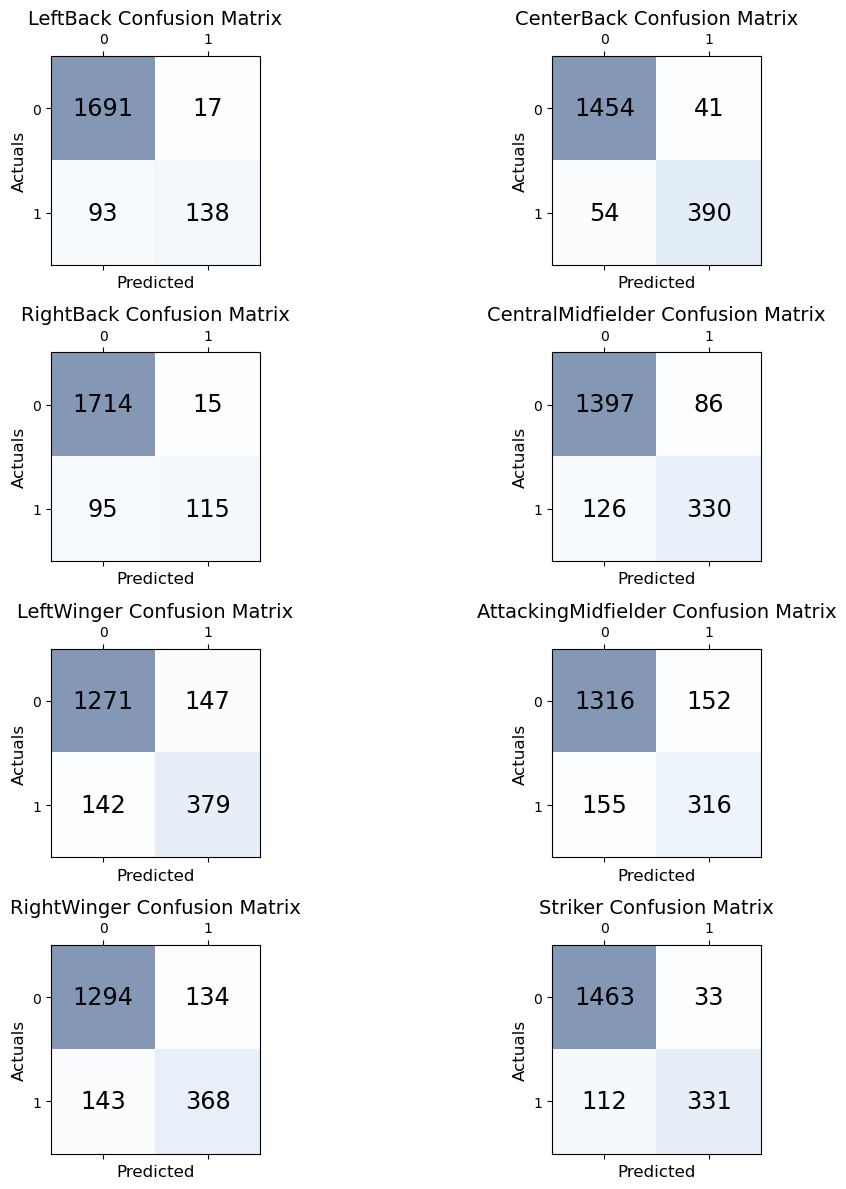

In [27]:
target_names = ['LeftBack', 'CenterBack', 'RightBack',
                'CentralMidfielder', 
                'LeftWinger', 'AttackingMidfielder', 'RightWinger', 'Striker']

multilabel_cm = multilabel_confusion_matrix(y_test, y_pred)

num_classes = len(target_names)
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))

axes = axes.flatten()


for i, ax in enumerate(axes):
    if i < num_classes:
        cm = multilabel_cm[i]
        ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                ax.text(c, r, str(cm[r, c]), va='center', ha='center', size='xx-large')

        ax.set_xlabel('Predicted', fontsize=12)
        ax.set_ylabel('Actuals', fontsize=12)
        ax.set_title(f'{target_names[i]} Confusion Matrix', fontsize=14)
    else:
        fig.delaxes(ax)

plt.tight_layout()

## Classification Report

In [28]:
target_names = ['LeftBack', 'CenterBack', 'RightBack',
                'CentralMidfielder',
                'LeftWinger', 'AttackingMidfielder', 'RightWinger',
                'Striker']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

           LeftBack       0.89      0.60      0.72       231
         CenterBack       0.90      0.88      0.89       444
          RightBack       0.88      0.55      0.68       210
  CentralMidfielder       0.79      0.72      0.76       456
         LeftWinger       0.72      0.73      0.72       521
AttackingMidfielder       0.68      0.67      0.67       471
        RightWinger       0.73      0.72      0.73       511
            Striker       0.91      0.75      0.82       443

          micro avg       0.79      0.72      0.75      3287
          macro avg       0.81      0.70      0.75      3287
       weighted avg       0.80      0.72      0.75      3287
        samples avg       0.81      0.77      0.76      3287



C:\Users\vassi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vassi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross-Validation

In [58]:
knnScore = cross_val_score(
    knnClass, X_train, y_train,
    cv=7, scoring='f1_weighted'
)

avg_knnScore = knnScore.mean()
print(f'Average Weighted F1 score: {avg_knnScore:.3f}')

Average Weighted F1 score: 0.750


In [62]:
knnScore = cross_val_score(
    knnClass, X_train, y_train,
    cv=9, scoring='f1_micro'
)

avg_knnScore = knnScore.mean()
print(f'Average Micro F1 score: {avg_knnScore:.3f}')

Average Micro F1 score: 0.751


# 2. Random Forest

In [40]:
rfc = RandomForestClassifier(n_estimators=500,max_features = 5) # το 5 πιο κοντά στη τετραγωνική ρίζα του 21

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [42]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

## Confusion Matrix

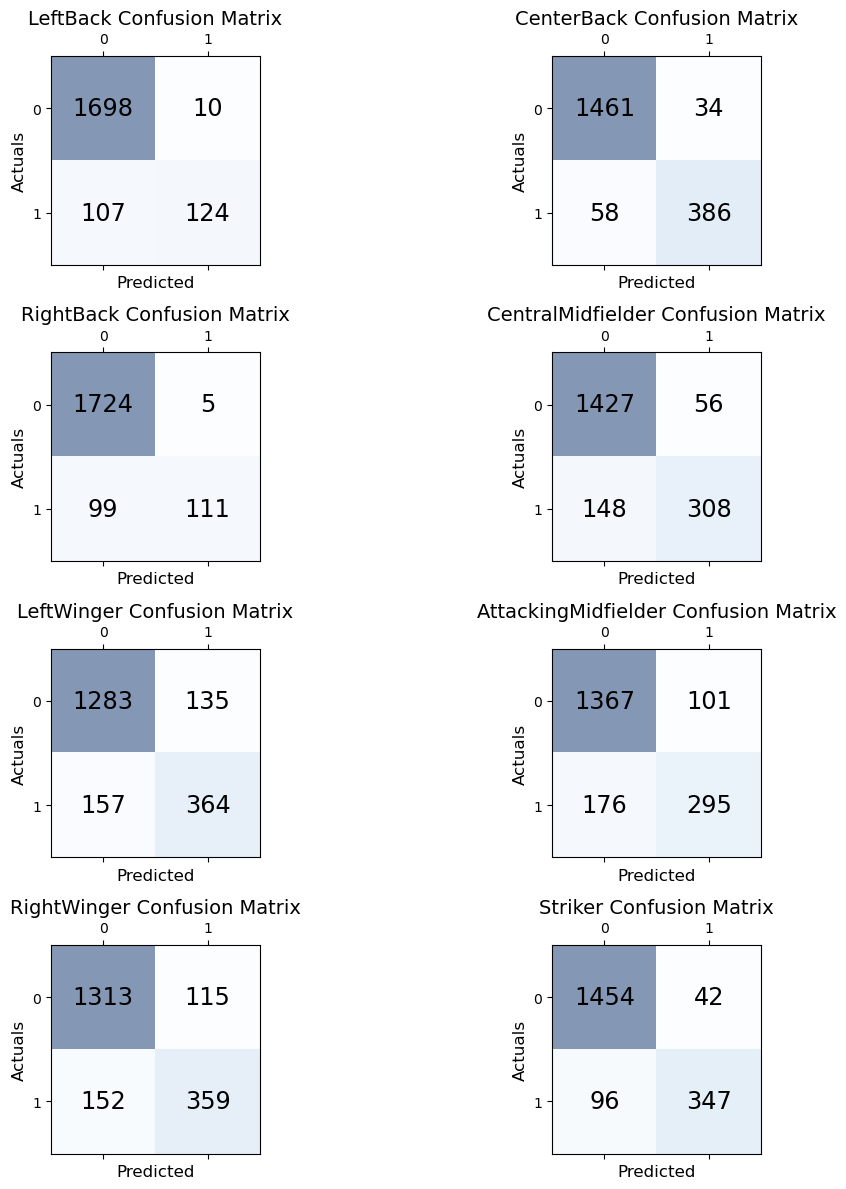

In [43]:
target_names = ['LeftBack', 'CenterBack', 'RightBack',
                'CentralMidfielder', 
                'LeftWinger', 'AttackingMidfielder', 'RightWinger', 'Striker']

multilabel_cm = multilabel_confusion_matrix(y_test, y_pred_test)

num_classes = len(target_names)
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_classes:
        cm = multilabel_cm[i]

        ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                ax.text(c, r, str(cm[r, c]), va='center', ha='center', size='xx-large')

        ax.set_xlabel('Predicted', fontsize=12)
        ax.set_ylabel('Actuals', fontsize=12)
        ax.set_title(f'{target_names[i]} Confusion Matrix', fontsize=14)
    else:
        fig.delaxes(ax)

plt.tight_layout()

## Classification Report

In [44]:
target_names = ['LeftBack', 'CenterBack', 'RightBack',
                'CentralMidfielder',
                'LeftWinger', 'AttackingMidfielder', 'RightWinger', 
                'Striker']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                     precision    recall  f1-score   support

           LeftBack       0.93      0.54      0.68       231
         CenterBack       0.92      0.87      0.89       444
          RightBack       0.96      0.53      0.68       210
  CentralMidfielder       0.85      0.68      0.75       456
         LeftWinger       0.73      0.70      0.71       521
AttackingMidfielder       0.74      0.63      0.68       471
        RightWinger       0.76      0.70      0.73       511
            Striker       0.89      0.78      0.83       443

          micro avg       0.82      0.70      0.75      3287
          macro avg       0.85      0.68      0.75      3287
       weighted avg       0.83      0.70      0.75      3287
        samples avg       0.81      0.75      0.75      3287



C:\Users\vassi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vassi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importances

In [45]:
rfc.feature_importances_

array([0.03831922, 0.03593791, 0.02924998, 0.04119404, 0.05032241,
       0.04202949, 0.06501719, 0.07108187, 0.03777755, 0.0447047 ,
       0.08461231, 0.03597295, 0.1070455 , 0.03954751, 0.04261339,
       0.03419702, 0.06150641, 0.03160449, 0.04240995, 0.03160789,
       0.03324823])

Text(0.5, 0, 'Relative Importance')

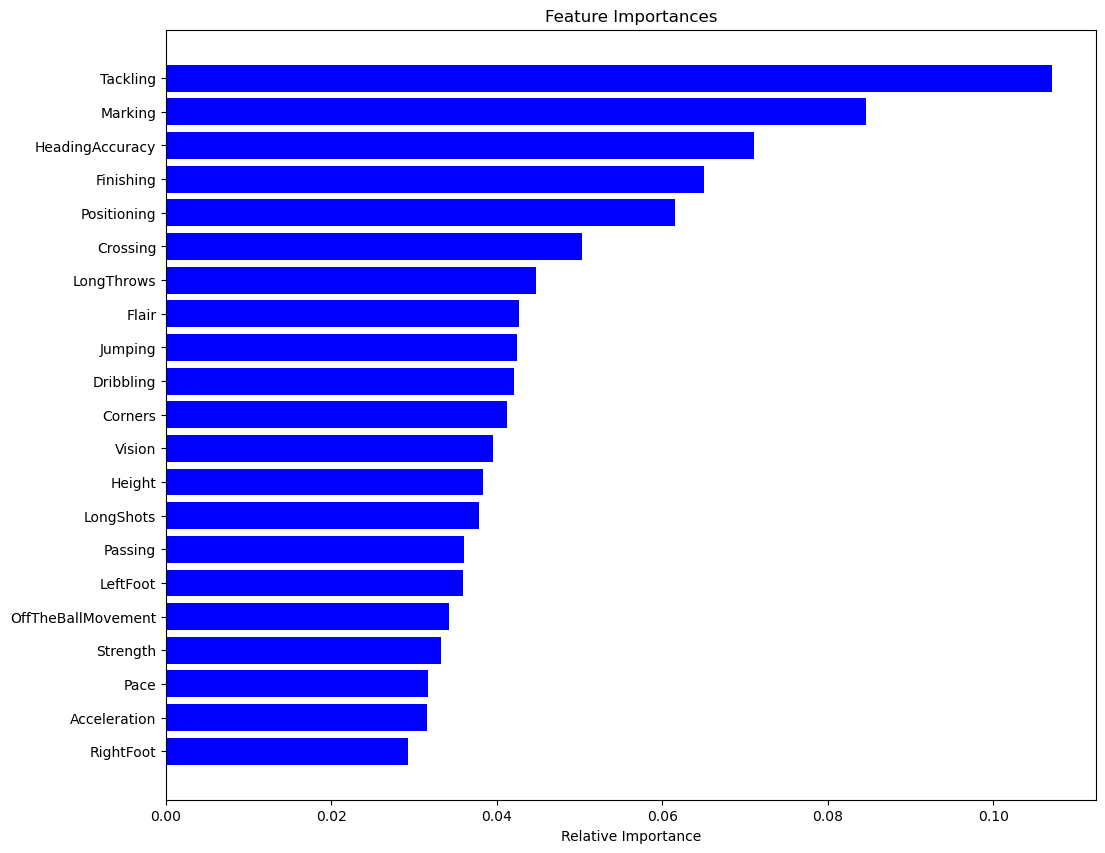

In [46]:
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [47]:
import eli5
eli5.explain_weights(rfc, feature_names=list(X_train.columns), top=21)

Weight,Feature
0.1070 ± 0.1398,Tackling
0.0846 ± 0.1281,Marking
0.0711 ± 0.0451,HeadingAccuracy
0.0650 ± 0.0662,Finishing
0.0615 ± 0.1038,Positioning
0.0503 ± 0.0205,Crossing
0.0447 ± 0.0133,LongThrows
0.0426 ± 0.0584,Flair
0.0424 ± 0.0394,Jumping
0.0420 ± 0.0442,Dribbling


## Cross-Validation

In [48]:
RF_Score = cross_val_score(
    rfc, X_train, y_train,
    cv=3, scoring='f1_weighted'
)

avg_RF_Score = RF_Score.mean()
print(f'Average Weighted F1 score: {avg_RF_Score:.3f}')

Average Weighted F1 score: 0.750


In [63]:
RF_Score = cross_val_score(
    rfc, X_train, y_train,
    cv=3, scoring='f1_micro'
)

avg_RF_Score = RF_Score.mean()
print(f'Average Micro F1 score: {avg_RF_Score:.3f}')

Average Micro F1 score: 0.752
